In [1]:
import IPython.display
import json
import xcube.api 

from xcube.api import read_cube


Importing lake polygons

In [2]:
file = 'Demo/Danube.geojson'
with open(file) as f:
    geom = json.load(f)


Importing a cube 

In [3]:
cube = read_cube('Demo/l2c-cyanoalert-olci-dan-Romania_2019-08-06_20.zarr')

---
For this demo, we are focussing on the Danube Delta in Romania

In [4]:
IPython.display.GeoJSON(geom)

<IPython.display.GeoJSON object>

The cube contains 5 time stamps:

In [5]:
cube.time

<xarray.DataArray 'time' (time: 5)>
array(['2019-08-16T04:03:39.513999616', '2019-08-17T09:21:51.376000000',
       '2019-08-18T00:55:51.728000000', '2019-08-19T00:29:57.696999936',
       '2019-08-20T00:03:55.287000064'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-08-16T04:03:39.513999616 ... 2019-08-20T00:03:55.287000064
Attributes:
    bounds:         time_bnds
    long_name:      time
    standard_name:  time

In [6]:
cube

<xarray.Dataset>
Dimensions:                 (bnds: 2, lat: 512, lon: 1024, time: 5)
Coordinates:
  * lat                     (lat) float64 45.33 45.33 45.33 ... 44.01 44.0 44.0
    lat_bnds                (lat, bnds) float64 dask.array<shape=(512, 2), chunksize=(512, 2)>
  * lon                     (lon) float64 28.0 28.0 28.01 ... 30.66 30.66 30.67
    lon_bnds                (lon, bnds) float64 dask.array<shape=(1024, 2), chunksize=(1024, 2)>
  * time                    (time) datetime64[ns] 2019-08-16T04:03:39.513999616 ... 2019-08-20T00:03:55.287000064
    time_bnds               (time, bnds) datetime64[ns] dask.array<shape=(5, 2), chunksize=(5, 2)>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_secchi_depth_1    (time, lat, lon) float64 dask.array<shape=(5, 512, 1024), chunksize=(1, 512, 1024)>
    c2rcc_secchi_depth_2    (time, lat, lon) float64 dask.array<shape=(5, 512, 1024), chunksize=(1, 512, 1024)>
    c2rcc_secchi_depth_3    (time, lat, lon) float64 dask.ar

Selecting Lake Razim from polygons

In [7]:
lake_razim = geom['features'][6]

Masking the cube to obtain only the area for the lake Razim.

In [8]:
masked_cube = xcube.api.mask_dataset_by_geometry(cube, lake_razim, no_clip=False, save_geometry_wkt=True)


Plotting chlorophyl from the masked cube for all time stamps. 

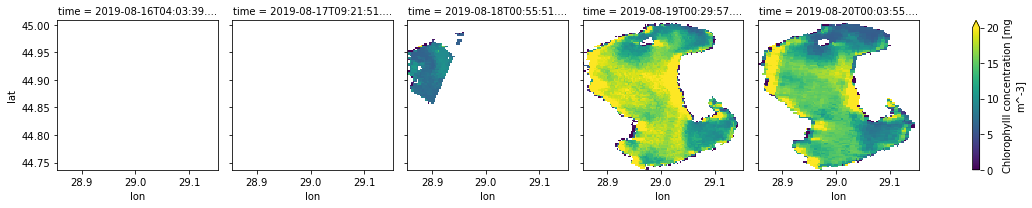

In [10]:
masked_cube.chl_c2rcc.plot.imshow(col='time', col_wrap=5, vmin=0, vmax=20, cmap='viridis')

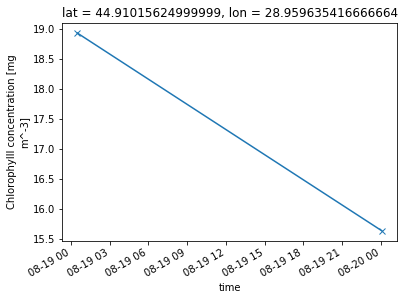

In [11]:
masked_cube.chl_c2rcc.sel(lat=44.91, lon=28.96, method='nearest').plot.line(marker='x') 